In [14]:
include("../utils.jl")
using .Utils

In [1]:
using DataFrames, CSV, Plots, StatsBase

In [3]:
dfs = Utils.adj_all_games()

140-element Array{Any,1}:
 668×35 DataFrame. Omitted printing of 30 columns
│ Row │ sport  │ league │ game_id │ a_team           │ h_team                │
│     │ String │ String │ Int64   │ String           │ String                │
├─────┼────────┼────────┼─────────┼──────────────────┼───────────────────────┤
│ 1   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 2   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 3   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 4   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 5   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 6   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 7   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 8   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ Golden State Warriors │
│ 9   │ BASK   │ NBA    │ 4253821 │ Sacramento Kings │ 

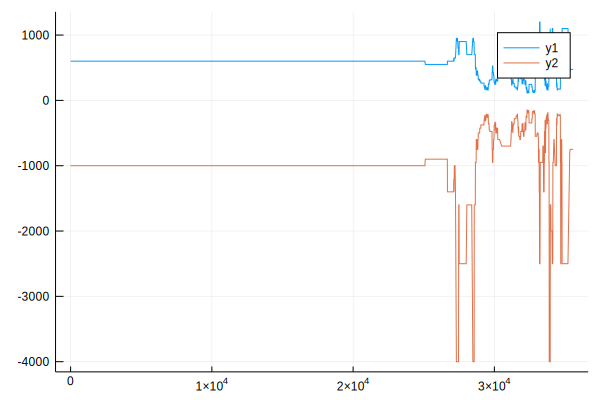

In [4]:
p = Utils.plot_game(dfs[1])

In [7]:
Utils.eq(-500)


0.2

In [12]:
Utils.roi(120, 120)

1//5

In [16]:
df = dfs[1]

,sport,league,game_id,a_team,h_team,cur_time,lms_date
,String,String,Int64,String,String,Float64,Dates…
1,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,0.0,2019-02-20
2,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,1329.04,2019-02-20
3,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,1405.68,2019-02-20
4,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,1646.59,2019-02-20
5,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,1914.81,2019-02-20
6,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,1988.74,2019-02-20
7,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,2064.29,2019-02-20
8,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,2400.05,2019-02-20
9,BASK,NBA,4253821,Sacramento Kings,Golden State Warriors,2438.19,2019-02-20


In [17]:
x = df.a_odds_ml
y = df.h_odds_ml


668-element Array{Int64,1}:
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
 -1000
     ⋮
 -2500
 -2500
 -2500
 -2500
 -2500
  -800
  -750
  -750
  -750
  -750
  -750
  -750

In [20]:
a, a2 = Utils.arr_roi(x, y)

(Any[-4//11, -4//11, -4//11, -4//11, -4//11, -4//11, -4//11, -4//11, -4//11, -4//11  …  -19//26, -19//26, -19//26, -2//9, -3//17, -3//17, -3//17, -3//17, -3//17, -3//17], Any[-2//35, -2//35, -2//35, -2//35, -2//35, -2//35, -2//35, -2//35, -2//35, -2//35  …  1//120, 1//120, 1//120, -1//10, -21//230, -21//230, -21//230, -21//230, -21//230, -21//230])

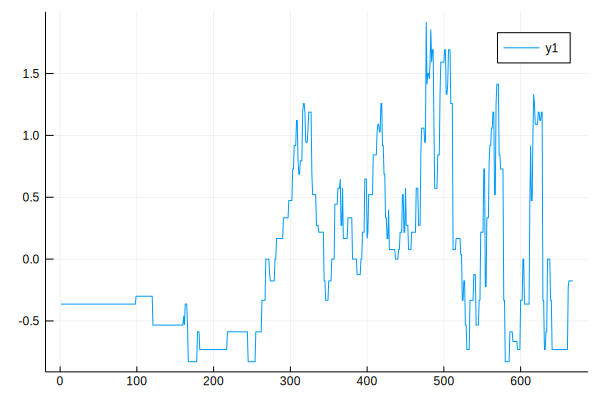

In [21]:
plot(a)

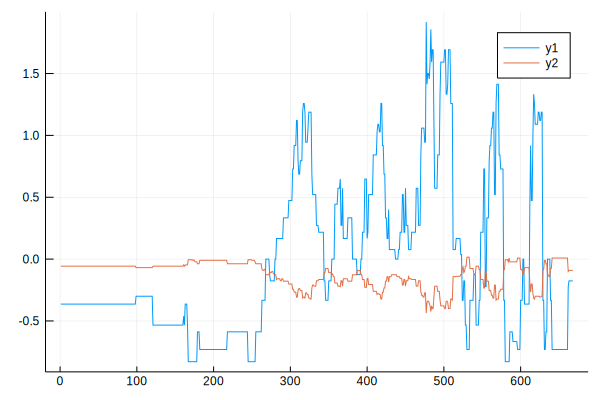

In [24]:
plot([a, a2])
